Baixar e instalar o NLTK, depois exemplos de texto pelo 'gutenberg'

In [98]:
import nltk

nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

Importar os textos de gutenberg e mostra o nomes dos arquivos.

In [99]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Pega todas as palavras do texto de shakespeare-caesar.txt

In [100]:
caesar_w = gutenberg.words('shakespeare-caesar.txt')
caesar_w

['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', ...]

In [101]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Código para pegar todas as sentenças do texto de shakepsere

In [102]:
caesar_s = gutenberg.sents('shakespeare-caesar.txt')
caesar_s

[['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']'], ['Actus', 'Primus', '.'], ...]

Código para pegar todas os parágrafos do texto de shakepsere

In [103]:
caesar_p = gutenberg.paras('shakespeare-caesar.txt')
caesar_p

[[['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']']], [['Actus', 'Primus', '.'], ['Scoena', 'Prima', '.']], ...]

Código para pegar a tupla de ocorrencia das palavras da obra, criando um top 15.

In [104]:
caesar_dist = nltk.probability.FreqDist(caesar_w)
caesar_dist.most_common(15) #Pega o "Top 15" palavras com maior ocorrencias

[(',', 2204),
 ('.', 1296),
 ('I', 531),
 ('the', 502),
 (':', 499),
 ('and', 409),
 ("'", 384),
 ('to', 370),
 ('you', 342),
 ('of', 336),
 ('?', 296),
 ('not', 249),
 ('a', 240),
 ('is', 230),
 ('And', 218)]

Para remover as ocorencias das pontuações é possivel fazer uma nova lista de palavras, removendo elas.

In [105]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [106]:
caesar_r = []
#Para cada palavara em 'caesar_w', adiciona na lista os que não forem pontuação.
for word in caesar_w:
    if word not in string.punctuation:
        caesar_r.append(word)

In [107]:
caesar_dist = nltk.probability.FreqDist(caesar_r)
caesar_dist.most_common(15)

[('I', 531),
 ('the', 502),
 ('and', 409),
 ('to', 370),
 ('you', 342),
 ('of', 336),
 ('not', 249),
 ('a', 240),
 ('is', 230),
 ('And', 218),
 ('d', 215),
 ('in', 204),
 ('that', 200),
 ('Caesar', 189),
 ('my', 188)]

In [108]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<WordListCorpusReader in '/home/codespace/nltk_data/corpora/stopwords'>

In [109]:
english_stopwords = stopwords.words('english')
english_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [110]:
caesar_rs = []
#Para cada palavara em 'caesar_w', adiciona na lista os que não forem pontuação.
for word in caesar_w:
    if word not in string.punctuation:
        if word.lower() not in english_stopwords:
            caesar_rs.append(word)

In [111]:
caesar_dist = nltk.probability.FreqDist(caesar_rs)
caesar_dist.most_common(10)

[('Caesar', 189),
 ('Brutus', 161),
 ('Bru', 153),
 ('haue', 128),
 ('shall', 107),
 ('Cassi', 107),
 ('thou', 100),
 ('Cassius', 85),
 ('Antony', 75),
 ('know', 66)]

<Axes: xlabel='Samples', ylabel='Counts'>

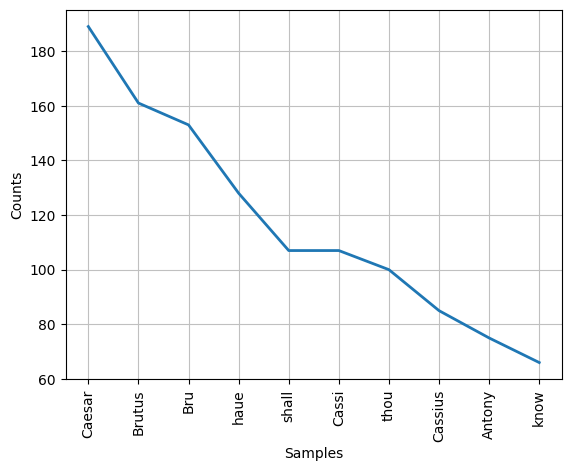

In [112]:
caesar_dist.plot(10)

In [113]:
caesar_dist.tabulate(10)

 Caesar  Brutus     Bru    haue   shall   Cassi    thou Cassius  Antony    know 
    189     161     153     128     107     107     100      85      75      66 


Representar no formato Texto usando a biblioteca Text

In [114]:
from nltk.text import Text
caesar_t = Text(caesar_w)
type(caesar_t)

nltk.text.Text

Mostre 5 Linhas onde a palavra "Antony" aparece, e depois a sequência...

In [115]:
caesar_t.concordance('Antony', lines=5)

Displaying 5 of 75 matches:
efulnesse . Exeunt . Enter Caesar , Antony for the Course , Calphurnia , Porti
rt Of that quicke Spirit that is in Antony : Let me not hinder Cassius your de
. He loues no Playes , As thou dost Antony : he heares no Musicke ; Seldome he
fer ' d him the Crowne ? Cask . Why Antony Bru . Tell vs the manner of it , ge
, I did not marke it . I sawe Marke Antony offer him a Crowne , yet ' twas not


Mostra os 4 bigramas mais frequentes no texto (Bigrama é uma relação de duas palavras. Ex: ['Lorem','Ipsum'])

In [116]:
caesar_t.collocations(num=4)

Mark Antony; Marke Antony; Good morrow; Caius Ligarius


Mostra as 20 palavras que ocorrem em contextos semelhantes a palavra "Caesar"

In [117]:
caesar_t.similar('Caesar')

me it brutus you he rome that cassius this if men worke him vs feare
world thee what know day


As ocorrencias do regex que determinam os trechos em que o token "O" é seguindo por um tokens que começa por "C" maisculo.

In [118]:
caesar_t.findall(r'<O><C.*>')

O Cicero; O Cassius; O Conspiracie; O Caesar; O Caesar; O Caesar; O
Constancie; O Caesar; O Caesar; O Caesar; O Cassius; O Cassius; O
Cassius; O Coward; O Cassius; O Clitus


Cita as ocorrencias das 4 palavras no texto inteiro. Mostrando em um grafico de dispersão

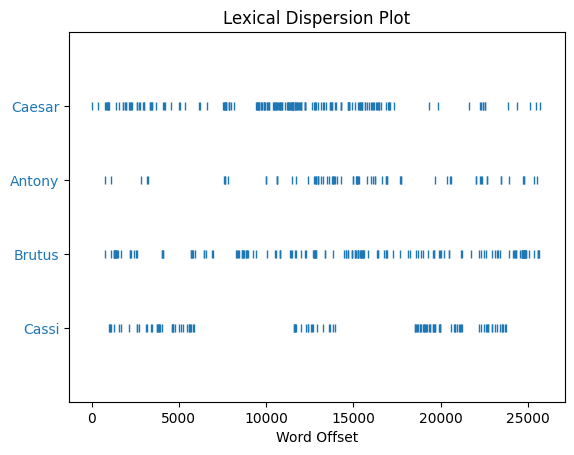

In [119]:
caesar_t.dispersion_plot(['Caesar','Antony','Brutus','Cassi'])

___ 
Usando bibiloteca brown

In [120]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /home/codespace/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [121]:
ed_p = brown.paras(categories='editorial')
fic_p = brown.paras(categories='fiction')
print('editorial = '+str(len(ed_p))+' paragráfos')
print('fiction = '+str(len(fic_p))+' paragráfos')

editorial = 1003 paragráfos
fiction = 1043 paragráfos


In [122]:
print(ed_p[:2])
print(fic_p[:2])

[[['Assembly', 'session', 'brought', 'much', 'good'], ['The', 'General', 'Assembly', ',', 'which', 'adjourns', 'today', ',', 'has', 'performed', 'in', 'an', 'atmosphere', 'of', 'crisis', 'and', 'struggle', 'from', 'the', 'day', 'it', 'convened', '.'], ['It', 'was', 'faced', 'immediately', 'with', 'a', 'showdown', 'on', 'the', 'schools', ',', 'an', 'issue', 'which', 'was', 'met', 'squarely', 'in', 'conjunction', 'with', 'the', 'governor', 'with', 'a', 'decision', 'not', 'to', 'risk', 'abandoning', 'public', 'education', '.']], [['There', 'followed', 'the', 'historic', 'appropriations', 'and', 'budget', 'fight', ',', 'in', 'which', 'the', 'General', 'Assembly', 'decided', 'to', 'tackle', 'executive', 'powers', '.'], ['The', 'final', 'decision', 'went', 'to', 'the', 'executive', 'but', 'a', 'way', 'has', 'been', 'opened', 'for', 'strengthening', 'budgeting', 'procedures', 'and', 'to', 'provide', 'legislators', 'information', 'they', 'need', '.']]]
[[['Thirty-three'], ['Scotty', 'did', 'no

Definir uma função para converter paragrafo em uma lista simples.

In [123]:
def flatten(paragraph):
    output = set([])
    for item in paragraph:
        if isinstance(item, (list, tuple)):
            output.update(item)
        else:
            output.add(item)
    return output

Nivelar as listas em um nivel, incluindo as palavras do paragrafo em conjunto de palavras onde cada palavra ocorre apenas uma unica vez.

In [124]:
ed_flat = []
for paragraph in ed_p:
    ed_flat.append(flatten(paragraph))
fic_flat = []
for paragraph in fic_p:
    fic_flat.append(flatten(paragraph))

In [125]:
print(ed_flat[:2])

[{'General', 'risk', 'and', 'The', 'convened', 'governor', 'in', 'which', 'good', 'schools', 'abandoning', 'not', 'a', 'It', 'atmosphere', 'met', 'crisis', 'struggle', 'day', '.', 'to', 'it', 'squarely', 'on', 'an', 'much', 'education', 'session', 'today', 'brought', 'of', 'faced', 'immediately', 'from', 'public', 'the', 'conjunction', 'decision', 'was', 'adjourns', ',', 'Assembly', 'issue', 'showdown', 'performed', 'has', 'with'}, {'General', 'but', 'procedures', 'and', 'The', 'strengthening', 'decided', 'powers', 'in', 'which', 'need', 'opened', 'for', 'a', 'way', 'final', '.', 'appropriations', 'to', 'tackle', 'provide', 'information', 'been', 'went', 'followed', 'the', 'decision', 'budget', ',', 'Assembly', 'fight', 'executive', 'legislators', 'they', 'has', 'budgeting', 'There', 'historic'}]


In [132]:
labeled_data = []
for paragraph in ed_flat:
    labeled_data.append((paragraph, 'editorial'))
for paragraph in fic_flat:
    labeled_data.append((paragraph, 'fiction'))

Para treinamento, a desordenação é fundamental para evitar treinamento falho ou baised.

In [133]:
from random import shuffle
shuffle(labeled_data)

In [134]:
tell_words = ['american', 'city', 'congress', 'country', 'county', 'editor', 'fact', 'government', 'national', 'nuclear', 'party', 'peace', 'political', 'power', 'president', 'public', 'state', 'states', 'united', 'war', 'washington', 'world', 'big', 'church', 'every', 'eyes', 'face', 'felt', 'found', 'god', 'hand', 'head', 'home', 'house', 'knew', 'moment', 'night', 'room', 'seemed', 'stood', 'think', 'though', 'thought', 'told', 'voice']

In [135]:
def define_features(paragraph):
    features = {}
    for tell_word in tell_words:
        features[tell_word] = tell_word in paragraph
    return features

feature_data = []
for labeled_paragraph in labeled_data:
    paragraph, label = labeled_paragraph
    feature_data.append((define_features(paragraph), label))

In [136]:
feature_data

[({'american': False,
   'city': False,
   'congress': False,
   'country': False,
   'county': False,
   'editor': False,
   'fact': False,
   'government': False,
   'national': False,
   'nuclear': False,
   'party': False,
   'peace': False,
   'political': False,
   'power': False,
   'president': False,
   'public': False,
   'state': False,
   'states': False,
   'united': False,
   'war': False,
   'washington': False,
   'world': False,
   'big': False,
   'church': False,
   'every': False,
   'eyes': False,
   'face': False,
   'felt': False,
   'found': False,
   'god': False,
   'hand': False,
   'head': False,
   'home': False,
   'house': False,
   'knew': False,
   'moment': False,
   'night': False,
   'room': False,
   'seemed': False,
   'stood': False,
   'think': False,
   'though': False,
   'thought': True,
   'told': False,
   'voice': False},
  'fiction'),
 ({'american': False,
   'city': False,
   'congress': False,
   'country': False,
   'county': False,
   

Diferenciando o conjunto de treino e de teste, neste caso (70% é treino, 30% é teste)

In [137]:
train_data = feature_data[:1432]
test_data = feature_data[1432:]
len(feature_data)

2046

In [138]:
print(train_data[0])

({'american': False, 'city': False, 'congress': False, 'country': False, 'county': False, 'editor': False, 'fact': False, 'government': False, 'national': False, 'nuclear': False, 'party': False, 'peace': False, 'political': False, 'power': False, 'president': False, 'public': False, 'state': False, 'states': False, 'united': False, 'war': False, 'washington': False, 'world': False, 'big': False, 'church': False, 'every': False, 'eyes': False, 'face': False, 'felt': False, 'found': False, 'god': False, 'hand': False, 'head': False, 'home': False, 'house': False, 'knew': False, 'moment': False, 'night': False, 'room': False, 'seemed': False, 'stood': False, 'think': False, 'though': False, 'thought': True, 'told': False, 'voice': False}, 'fiction')


Faz o processo de treinamento com o algoritmo Naive Bayes, um teste com o modelo produzido retorna a categoria do exemplo utilizado no treinamento.

In [ ]:
#Bayes e o nome do modelo
bayes = nltk.NaiveBayesClassifier.train(train_data)
bayes.classify(train_data[0][0])

'fiction'

Agora é possivel analisar os atributos mais siginifcativos do algortimo e acurácia do teste com o conjunto de testes.
Dependendo do resultado, a técnica deve ser trocada e testada para melhor eficiencia. Ou aumentar o numero de palavras.

In [148]:
bayes.show_most_informative_features()

Most Informative Features
                  editor = True           editor : fictio =     18.5 : 1.0
                   stood = True           fictio : editor =     16.9 : 1.0
                 nuclear = True           editor : fictio =     15.6 : 1.0
                 thought = True           fictio : editor =     12.7 : 1.0
                   peace = True           editor : fictio =     12.0 : 1.0
               political = True           editor : fictio =      9.8 : 1.0
                   voice = True           fictio : editor =      9.7 : 1.0
                   power = True           editor : fictio =      8.5 : 1.0
                  seemed = True           fictio : editor =      7.8 : 1.0
                    eyes = True           fictio : editor =      7.3 : 1.0


In [151]:
nltk.classify.accuracy(bayes, test_data)

0.6465798045602605

___

Aula minicurso "PLN na prática" com Prof. Rodrigo Goulart, SIRC 2024.

05 de novembro de 2024.

Fonte: https://github.com/rodrigogoulart/SIRC2024